In [75]:
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re, numpy as np, os

In [76]:
def prepare_data(path):
	"""
	:param text: raw text file
	:type text: str
	:return list of str lines, list of int labels
	"""
	raw = []    # Raw lines
	lines = []  # Tokenized
	labels = [] # Labels
	with open(path, mode="r", encoding="utf-8") as f:
		text = f.readlines()
		for line in text:
			if len(line) > 0:
				raw.append(prepare_text(line[:-3]))     # :-2 to exclude \t
				lines.append(prepare_text(line[:-3], token=True))
				labels.append(int(line[-2]))            # The label
	return raw, lines, labels


def prepare_text(text, token=False):
	return word_tokenize(re.sub(r'\W', ' ', text.lower().replace('\'',''))) \
		if token else re.sub(r'\W', ' ', text.lower().replace('\'',''))


def datafromfile(path):
	with open(path, mode="r", encoding="utf-8") as f:
		text = f.read()
		f.close()

	raw, lines, labels = prepare_data(path)
	return text, raw, lines, labels


def export_vocabulary(path, raw, vectorizer):
	"""

	:param raw: entire raw corpus text string
	:param vectorizer: pre-fit vectorizer
	:type vectorizer CountVectorizer
	:type raw list
	"""

	x = vectorizer.transform(raw)
	# [word, id, frequency]
	featurenames = vectorizer.get_feature_names()
	indices = { k : featurenames.index(k) for k in vectorizer.vocabulary_.keys()}
	vocab = [k+" "+str(indices[k])+" "+str(x[0,indices[k]])+"\n" for k,v in vectorizer.vocabulary_.items()]
	with open(path, "w") as f:
		f.writelines(vocab)
		f.close()
	return vocab


def export_data(fname, x_tokens, vectorizer, y):
	'''

	:param vectorizer:
	:type vectorizer CountVectorizer
	:return:
	'''
	out = ""
	for i in range(0, len(y)):
		for token in x_tokens[i]:
			idx = vectorizer.vocabulary_.get(token)
			if idx:
				out += str(vectorizer.vocabulary_[token])
				out += " "
		out = out[:-1] + "\t" + str(y[i]) + "\n"
	with open(fname, mode="w", encoding="utf-8") as f:
		f.write(out)
		f.close()

In [77]:
yelp_train_raw, yelp_train_rawlines, yelp_train_tokenlines, yelp_train_y = \
	datafromfile(os.path.join("data","yelp-train.txt"))
yelp_valid_raw, yelp_valid_rawlines, yelp_valid_tokenlines, yelp_valid_y = \
	datafromfile(os.path.join("data","yelp-valid.txt"))
yelp_test_raw, yelp_test_rawlines, yelp_test_tokenlines, yelp_test_y = \
	datafromfile(os.path.join("data","yelp-test.txt"))

yelp_vectorizer_bbow = CountVectorizer(max_features=10000, binary=True)
yelp_bbow_train_x = yelp_vectorizer_bbow.fit_transform(np.array(yelp_train_rawlines))
yelp_bbow_valid_x = yelp_vectorizer_bbow.transform(np.array(yelp_valid_rawlines))
yelp_bbow_test_x = yelp_vectorizer_bbow.transform(np.array(yelp_test_rawlines))

yelp_train_y = np.array(yelp_train_y)
yelp_valid_y = np.array(yelp_valid_y)
yelp_test_y = np.array(yelp_test_y)

yelp_vectorizer = CountVectorizer(max_features=10000)
yelp_fbow_train_x = yelp_vectorizer.fit_transform(np.array(yelp_train_rawlines))
yelp_fbow_valid_x = yelp_vectorizer.transform(np.array(yelp_valid_rawlines))
yelp_fbow_test_x = yelp_vectorizer.transform(np.array(yelp_test_rawlines))


In [78]:
IMDB_train_raw, IMDB_train_rawlines, IMDB_train_tokenlines, IMDB_train_y = \
	datafromfile(os.path.join("data","IMDB-train.txt"))
IMDB_valid_raw, IMDB_valid_rawlines, IMDB_valid_tokenlines, IMDB_valid_y = \
	datafromfile(os.path.join("data","IMDB-valid.txt"))
IMDB_test_raw, IMDB_test_rawlines, IMDB_test_tokenlines, IMDB_test_y = \
	datafromfile(os.path.join("data","IMDB-test.txt"))

IMDB_vectorizer_bbow = CountVectorizer(max_features=10000, binary=True)
IMDB_bbow_train_x = IMDB_vectorizer_bbow.fit_transform(np.array(IMDB_train_rawlines))
IMDB_bbow_valid_x = IMDB_vectorizer_bbow.transform(np.array(IMDB_valid_rawlines))
IMDB_bbow_test_x = IMDB_vectorizer_bbow.transform(np.array(IMDB_test_rawlines))

IMDB_train_y = np.array(IMDB_train_y)
IMDB_valid_y = np.array(IMDB_valid_y)
IMDB_test_y = np.array(IMDB_test_y)

IMDB_vectorizer_fbow = CountVectorizer(max_features=10000)
IMDB_fbow_train_x = IMDB_vectorizer_fbow.fit_transform(np.array(IMDB_train_rawlines))
IMDB_fbow_valid_x = IMDB_vectorizer_fbow.transform(np.array(IMDB_valid_rawlines))
IMDB_fbow_test_x = IMDB_vectorizer_fbow.transform(np.array(IMDB_test_rawlines))


# IMDB

In [79]:
from sklearn.dummy import DummyClassifier

In [80]:
randomClassifier = DummyClassifier(strategy="uniform")
majorityClassifier = DummyClassifier(strategy="most_frequent")

## BBOW

In [81]:
randomClassifier.fit(IMDB_bbow_train_x, IMDB_train_y)
majorityClassifier.fit(IMDB_bbow_train_x, IMDB_train_y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [82]:
from sklearn.metrics import f1_score

In [104]:
IMDB_bbow_test_pred = randomClassifier.predict(IMDB_bbow_test_x)
print(f1_score(IMDB_test_y,IMDB_bbow_test_pred))
IMDB_bbow_test_pred = majorityClassifier.predict(IMDB_bbow_test_x)
print(f1_score(IMDB_test_y,IMDB_bbow_test_pred))

0.5021426568945492
0.0


In [85]:
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid

In [86]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [87]:
params_bnb = ParameterGrid({
    'alpha' : np.logspace(0,3,10)
})
params_gnb = ParameterGrid({
    'var_smoothing' : np.logspace(-9, 1, 10)
})
params_svc = ParameterGrid({
    'loss' : ['squared_hinge'],
	'dual' : [False, True],
	'C' : np.logspace(-1, 1, 5)
})
depths = [None]
depths.extend(np.logspace(0, 2, 5).tolist())
maxfeatures = [None, 'auto', 'sqrt', 'log2']
params_tree = ParameterGrid({
	'criterion' : ['gini', 'entropy'],
	'max_depth' : depths,
    'splitter' : ['best', 'random'],
    'max_features' : maxfeatures
})

In [88]:
print(params_bnb.param_grid, params_gnb.param_grid, params_svc.param_grid, params_tree.param_grid, sep='\n')

[{'alpha': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])}]
[{'var_smoothing': array([1.00000000e-09, 1.29154967e-08, 1.66810054e-07, 2.15443469e-06,
       2.78255940e-05, 3.59381366e-04, 4.64158883e-03, 5.99484250e-02,
       7.74263683e-01, 1.00000000e+01])}]
[{'loss': ['squared_hinge'], 'dual': [False, True], 'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])}]
[{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0], 'splitter': ['best', 'random'], 'max_features': [None, 'auto', 'sqrt', 'log2']}]


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.9s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


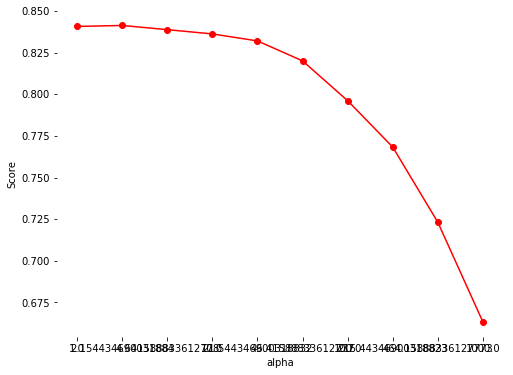

In [89]:
best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores = pf.bestFit(
    BernoulliNB, params_bnb, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score)

In [90]:
print(best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores, sep='\n')

BernoulliNB(alpha=2.154434690031884, binarize=0.0, class_prior=None,
      fit_prior=True)
0.8413021363173957
[BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=2.154434690031884, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=4.641588833612778, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=21.544346900318832, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=46.41588833612777, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=100.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=215.44346900318823, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=464.15888336127773, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=1000.0, binarize=0.0, class_prior=None, fit_prior=True)]
[0.8407268297634758, 0.8413021363173957,

-------------FITTING MODELS-------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.7s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   45.0s remaining:    0.0s


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


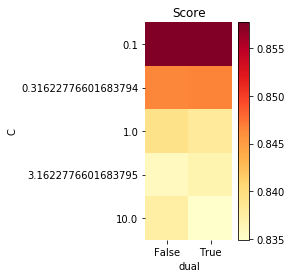

In [91]:
best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores = pf.bestFit(
    LinearSVC, params_svc, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score, n_jobs=1)

In [92]:
print(best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores, sep='\n')

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.8577142285771424
[LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=True,
     fit_intercept=True, intercept_

In [93]:
best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores = pf.bestFit(
    DecisionTreeClassifier, params_tree, IMDB_bbow_train_x, IMDB_train_y, IMDB_bbow_valid_x, IMDB_valid_y, metric=f1_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   24.0s


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.4s


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   24.9s


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


Too many dimensions to plot.


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.0s finished


In [94]:
print(best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores, sep='\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.751105096977898
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_lea

In [108]:
print("Best BerNB Test F1:", f1_score(IMDB_test_y, best_bbow_nb.predict(IMDB_bbow_test_x)),
      "\tValid:", best_bbow_nb_score_valid, "\tTrain:", f1_score(IMDB_train_y, best_bbow_nb.predict(IMDB_bbow_train_x)))
print("Best LinSVC Test F1:", f1_score(IMDB_test_y, best_bbow_svc.predict(IMDB_bbow_test_x)),
      "\tValid:", best_bbow_svc_score_valid, "\tTrain:", f1_score(IMDB_train_y, best_bbow_svc.predict(IMDB_bbow_train_x)))
print("Best D-tree Test F1:", f1_score(IMDB_test_y, best_bbow_tree.predict(IMDB_bbow_test_x)),
      "\tValid:", best_bbow_tree_score_valid, "\tTrain:", f1_score(IMDB_train_y, best_bbow_tree.predict(IMDB_bbow_train_x)))

Best BerNB Test F1: 0.8300405059105563 	Valid: 0.8413021363173957 	Train: 0.8690508566766386
Best LinSVC Test F1: 0.8490452744085506 	Valid: 0.8577142285771424 	Train: 0.997600319957339
Best D-tree Test F1: 0.7558634625099229 	Valid: 0.751105096977898 	Train: 0.7927529299210715


## FBOW

In [105]:
randomClassifier.fit(IMDB_fbow_train_x, IMDB_train_y)
majorityClassifier.fit(IMDB_fbow_train_x, IMDB_train_y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [106]:
IMDB_fbow_test_pred = randomClassifier.predict(IMDB_fbow_test_x)
print(f1_score(IMDB_test_y,IMDB_fbow_test_pred))
IMDB_fbow_test_pred = majorityClassifier.predict(IMDB_fbow_test_x)
print(f1_score(IMDB_test_y,IMDB_fbow_test_pred))

0.49818942624929585
0.0


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   48.5s remaining:   48.5s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   48.8s remaining:   20.9s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   53.8s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   46.5s finished


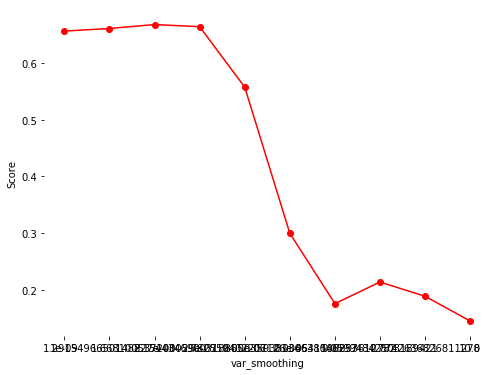

In [97]:
best_fbow_NB, best_fbow_NB_score, all_models, all_scores = pf.bestFit(
    GaussianNB, params_gnb, IMDB_fbow_train_x.toarray(), IMDB_train_y, IMDB_fbow_valid_x.toarray(), IMDB_valid_y, metric=f1_score)

In [100]:
print(best_fbow_NB, best_fbow_NB_score, all_models, all_scores, sep='\n')

GaussianNB(priors=None, var_smoothing=1.668100537200059e-07)
0.6679117544064433
[LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=1.0, clas

-------------FITTING MODELS-------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.4s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.0s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.6min remaining:    0.0s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.0min remaining:    0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


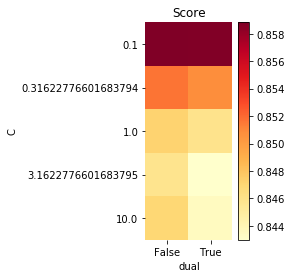

In [98]:
best_fbow_svc, best_fbow_svc_score, all_models, all_scores = pf.bestFit(
    LinearSVC, params_svc, IMDB_fbow_train_x, IMDB_train_y, IMDB_fbow_valid_x, IMDB_valid_y, metric=f1_score, n_jobs=1)

In [101]:
print(best_fbow_svc, best_fbow_svc_score, all_models, all_scores, sep='\n')

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.8588282343531293
[LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=True,
     fit_intercept=True, intercept_

In [102]:
best_fbow_tree, best_fbow_tree_score, all_models, all_scores = pf.bestFit(
    DecisionTreeClassifier, params_tree, IMDB_fbow_train_x, IMDB_train_y, IMDB_fbow_valid_x, IMDB_valid_y, metric=f1_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.2s


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   24.5s


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.9s


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.4s


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


Too many dimensions to plot.


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.0s finished


In [103]:
print(best_fbow_tree, best_fbow_tree_score, all_models, all_scores, sep='\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
0.7536606373815676
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_

# YELP
## BBOW

In [110]:
randomClassifier.fit(yelp_bbow_train_x, yelp_train_y)
majorityClassifier.fit(yelp_bbow_train_x, yelp_train_y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [117]:
yelp_bbow_test_pred = randomClassifier.predict(yelp_bbow_test_x)
print(f1_score(yelp_test_y,yelp_bbow_test_pred,average='weighted'))
yelp_bbow_test_pred = majorityClassifier.predict(yelp_bbow_test_x)
print(f1_score(yelp_test_y,yelp_bbow_test_pred,average='weighted'))


0.22343805148469315
0.18238490007401925


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


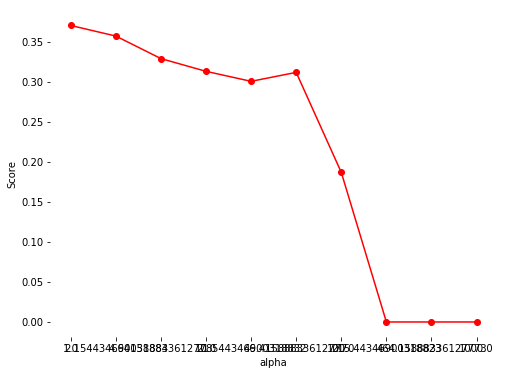

In [121]:
best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores = pf.bestFit(
    BernoulliNB, params_bnb, yelp_bbow_train_x, yelp_train_y, yelp_bbow_valid_x, yelp_valid_y,
    metric = lambda y_true, y_score, average=None, sample_weight=None, max_fpr=None: f1_score(y_true, y_score, average='weighted'))

In [122]:
print(best_bbow_nb, best_bbow_nb_score_valid, all_models, all_scores, sep='\n')

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.3705519931420435
[BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=2.154434690031884, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=4.641588833612778, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=21.544346900318832, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=46.41588833612777, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=100.0, binarize=0.0, class_prior=None, fit_prior=True), BernoulliNB(alpha=215.44346900318823, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=464.15888336127773, binarize=0.0, class_prior=None,
      fit_prior=True), BernoulliNB(alpha=1000.0, binarize=0.0, class_prior=None, fit_prior=True)]
[0.3705519931420435, 0.35730786311949564, 0.3291528233579581

-------------FITTING MODELS-------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.7s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.5s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   44.5s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   47.8s remaining:    0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


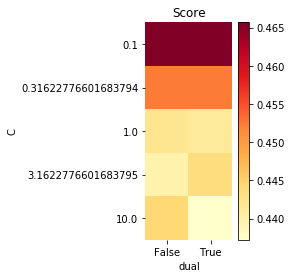

In [123]:
best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores = pf.bestFit(
    LinearSVC, params_svc, yelp_bbow_train_x, yelp_train_y, yelp_bbow_valid_x, yelp_valid_y,
    metric = lambda y_true, y_score, average=None, sample_weight=None, max_fpr=None: f1_score(y_true, y_score, average='weighted'), n_jobs=1)

In [124]:
print(best_bbow_svc, best_bbow_svc_score_valid, all_models, all_scores, sep='\n')

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.4656823924722863
[LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0), LinearSVC(C=0.31622776601683794, class_weight=None, dual=True,
     fit_intercept=True, intercept_

In [125]:
best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores = pf.bestFit(
    DecisionTreeClassifier, params_tree, yelp_bbow_train_x, yelp_train_y, yelp_bbow_valid_x, yelp_valid_y,
    metric = lambda y_true, y_score, average=None, sample_weight=None, max_fpr=None: f1_score(y_true, y_score, average='weighted'))

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1885s.) Setting batch_size=2.


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1386s.) Setting batch_size=4.


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.1s


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    4.7s


[Parallel(n_jobs=-1)]: Batch computation too slow (2.5879s.) Setting batch_size=2.


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


Too many dimensions to plot.


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


In [126]:
print(best_bbow_tree, best_bbow_tree_score_valid, all_models, all_scores, sep='\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
0.3613538425760625
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_

In [ ]:
print("Best BerNB Test F1:", f1_score(yelp_test_y, best_bbow_nb.predict(yelp_bbow_test_x),average='weighted'),
      "\tValid:", best_bbow_nb_score_valid, "\tTrain:", f1_score(yelp_train_y, best_bbow_nb.predict(yelp_bbow_train_x),average='weighted'))
print("Best LinSVC Test F1:", f1_score(yelp_test_y, best_bbow_svc.predict(yelp_bbow_test_x),average='weighted'),
      "\tValid:", best_bbow_svc_score_valid, "\tTrain:", f1_score(yelp_train_y, best_bbow_svc.predict(yelp_bbow_train_x),average='weighted'))
print("Best D-tree Test F1:", f1_score(yelp_test_y, best_bbow_tree.predict(yelp_bbow_test_x),average='weighted'),
      "\tValid:", best_bbow_tree_score_valid, "\tTrain:", f1_score(yelp_train_y, best_bbow_tree.predict(yelp_bbow_train_x),average='weighted'))

## FBOW